In [4]:
import pandas as pd

csv_file_path = 'mushroom_cleaned.csv'

data = pd.read_csv(csv_file_path)

data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


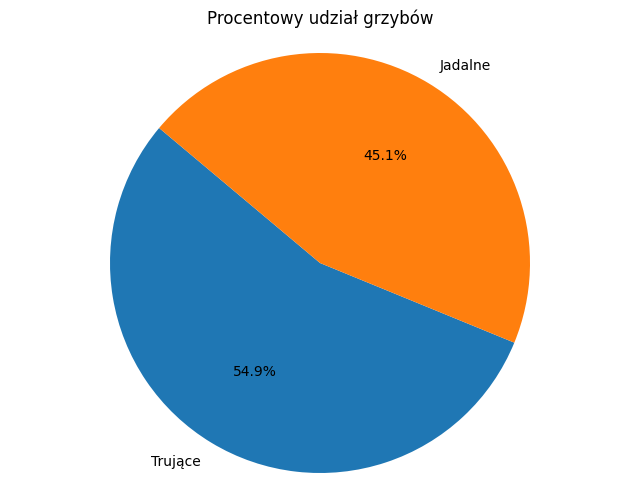

class
1    54.918109
0    45.081891
Name: count, dtype: float64


In [5]:
import matplotlib.pyplot as plt

class_labels = ['Trujące', 'Jadalne']

class_counts = data['class'].value_counts()

class_percentages = class_counts / class_counts.sum() * 100

plt.figure(figsize=(8, 6))
plt.pie(class_percentages, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Procentowy udział grzybów')
plt.axis('equal')
plt.show()
print(class_percentages)


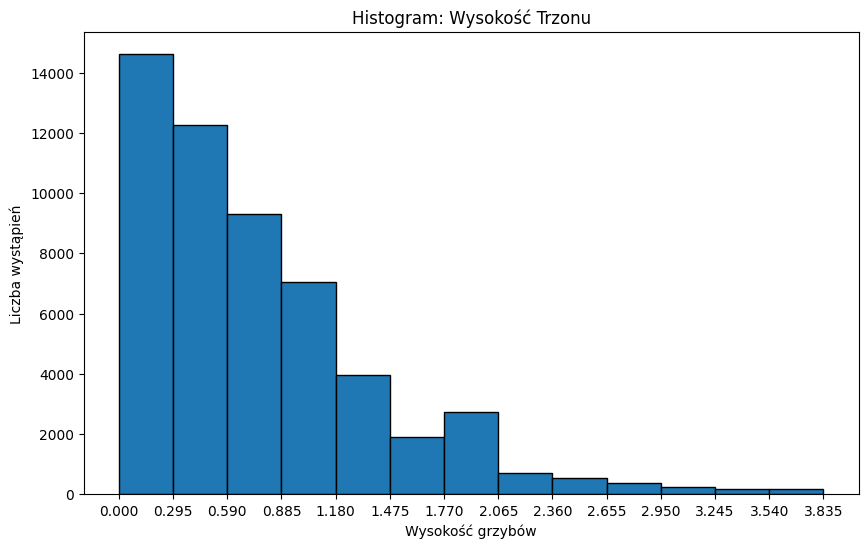

In [6]:
import numpy as np
import matplotlib.pyplot as plt

stem_heights = data['stem-height']

bin_edges = np.linspace(min(stem_heights), max(stem_heights), num=14)  # 10 równych przedziałów

plt.figure(figsize=(10, 6))
plt.hist(stem_heights, bins=bin_edges, edgecolor='black')

plt.xlabel('Wysokość grzybów')
plt.ylabel('Liczba wystąpień')
plt.title('Histogram: Wysokość Trzonu')

plt.xticks(bin_edges)

plt.show()

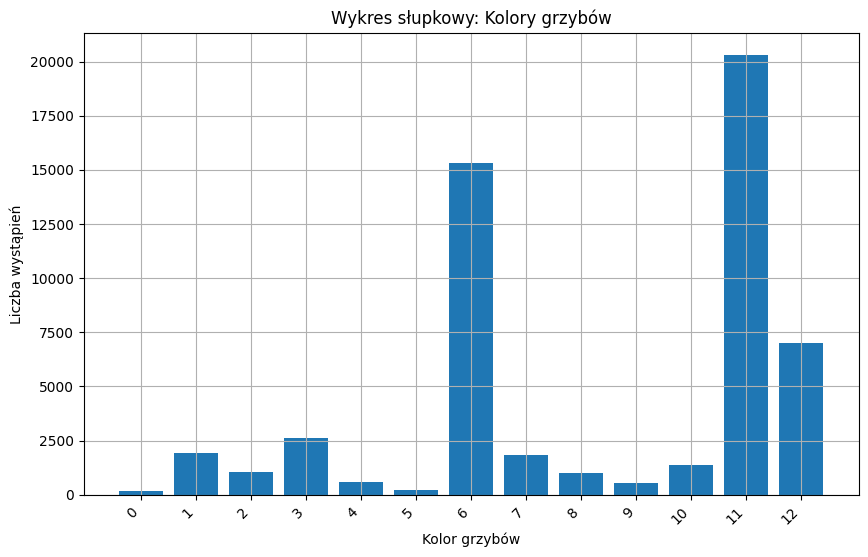

In [8]:
import matplotlib.pyplot as plt

colors = data['stem-color'].value_counts()

sorted_colors = colors.sort_index()

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_colors)), sorted_colors)

plt.rcParams.update({'font.size': 10})

plt.xlabel('Kolor grzybów')
plt.ylabel('Liczba wystąpień')
plt.title('Wykres słupkowy: Kolory grzybów')

plt.xticks(range(len(sorted_colors)), sorted_colors.index, rotation=45, ha='right')

plt.grid(True)

plt.show()


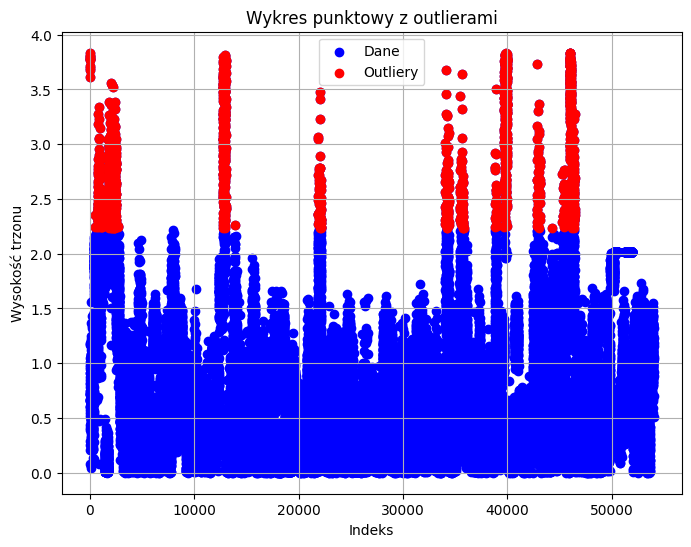

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['stem-height'], color='blue', label='Dane')

Q1 = data['stem-height'].quantile(0.25)
Q3 = data['stem-height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['stem-height'] < lower_bound) | (data['stem-height'] > upper_bound)]
plt.scatter(outliers.index, outliers['stem-height'], color='red', label='Outliery')

plt.legend()
plt.xlabel('Indeks')
plt.ylabel('Wysokość trzonu')
plt.title('Wykres punktowy z outlierami')
plt.grid(True)


plt.show()


In [10]:
# Sprawdzenie brakujących wartości
missing_values = data.isnull().sum()
print("Liczba brakujących wartości w każdej kolumnie:")
print(missing_values)


Liczba brakujących wartości w każdej kolumnie:
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


In [11]:
mean_values = data.mean()

print("Średnie wartości cech:")
print(mean_values)

Średnie wartości cech:
cap-diameter        567.257204
cap-shape             4.000315
gill-attachment       2.142056
gill-color            7.329509
stem-height           0.759110
stem-width         1051.081299
stem-color            8.418062
season                0.952163
class                 0.549181
dtype: float64


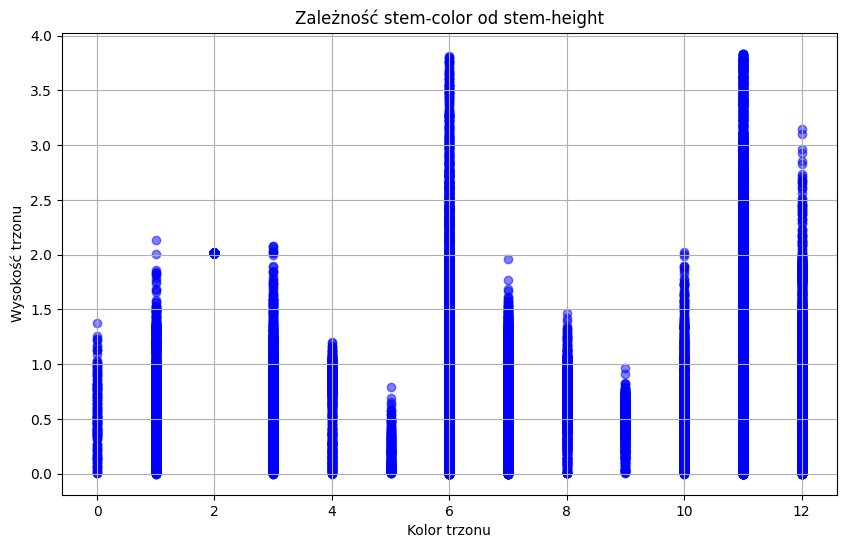

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['stem-color'], data['stem-height'], alpha=0.5, color='blue')

plt.title('Zależność stem-color od stem-height')
plt.xlabel('Kolor trzonu')
plt.ylabel('Wysokość trzonu')

plt.grid(True)

plt.show()

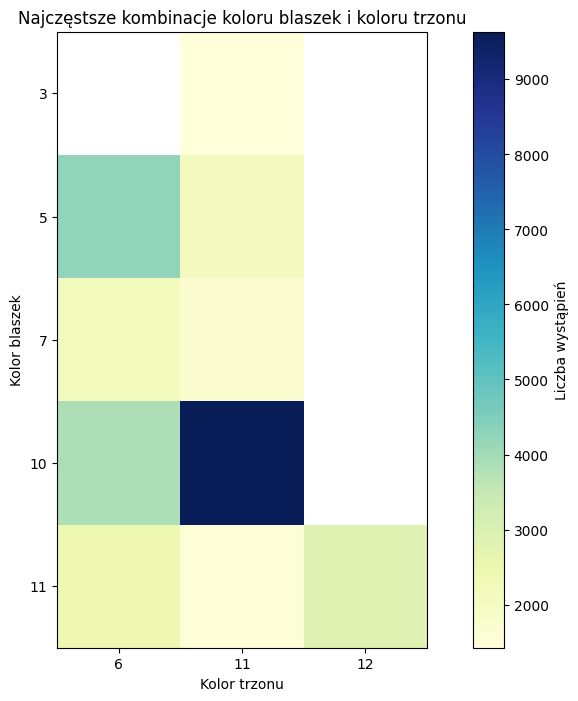

In [13]:
import matplotlib.pyplot as plt

top_combinations = 10

top_combinations_df = data.groupby(['gill-color', 'stem-color']).size().reset_index(name='count')\
    .sort_values(by='count', ascending=False).head(top_combinations)

pivot_table = top_combinations_df.pivot_table(index='gill-color', columns='stem-color', values='count')

plt.figure(figsize=(12, 8))
plt.imshow(pivot_table, cmap='YlGnBu', interpolation='nearest')

plt.title('Najczęstsze kombinacje koloru blaszek i koloru trzonu')
plt.xlabel('Kolor trzonu')
plt.ylabel('Kolor blaszek')

plt.colorbar(label='Liczba wystąpień')

plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index)

plt.show()
